## Project Title: DNA Sequence Classification and Analysis

### In this project, I developed a machine learning pipeline to classify DNA sequences based on k-mer patterns, leveraging both supervised and unsupervised learning techniques. 

**Objective:** To predict gene functions from DNA sequences across multiple species (human, chimpanzee, dog) using k-mer based feature extraction and machine learning models.

In [8]:
# importing necessary functions

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline  

 ## Using data from multiple species can improve model robustness and generalizability. 

`pd.read_table()`: This is a function from the pandas library used to read data from a file into a pandas DataFrame. It is typically used for reading tabular data from a text file.

`DataFrame`: The result of this function call is stored in the variable human_data, which is a pandas DataFrame. This DataFrame is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

In [9]:
# read the human data
human_data = pd.read_table('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/human.txt')

# read chimpanzee and dog data sets

chimp_data = pd.read_table('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/chimpanzee.txt')
dog_data = pd.read_table('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/dog.txt')

In [10]:


# show first 5 rows of each of the data sests
human_data.head()
chimp_data.head()
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


The function `getKmers` is designed to extract all possible overlapping k-mers of a specified length from a given sequence string. 

K-mer: A k-mer is a substring of length k contained within a biological sequence. In the context of DNA, RNA, or protein sequences, k-mers are used to represent the sequence in smaller, manageable pieces. For example, if k=6, then the k-mers are called hexamers.

### Parameters:

sequence: This is the input sequence string from which k-mers will be extracted. It could be a DNA, RNA, or protein sequence.
size: This is the length of each k-mer. The default value is 6, meaning that if no size is specified, the function will extract hexamers.
Function Logic:

The function uses a list comprehension to iterate over the sequence.
For each position x in the sequence, it extracts a substring of length size starting from x.
The range for `x` is from `0` to `len(sequence) - size + 1`, ensuring that the `k-mers` are extracted until the end of the sequence.
Each k-mer is converted to lowercase using .lower().

### Output:

The function returns a list of all possible overlapping k-mers of the specified length from the sequence.



In [11]:
# function to convert sequence strings into k-mer words

def getKmers(sequence , size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

The code snippet you provided is using the getKmers function to process sequence data from three different datasets: human.txt, chimpanzee.txt, and dog.txt. 

Let's break down what each line of the code is doing and its purpose:



### Applying the getKmers Function:

For each dataset (human_data, chimp_data, dog_data), the apply method is used to apply the getKmers function to each row of the DataFrame.
lambda x: getKmers(x['sequence']) is a lambda function that takes each row x and applies getKmers to the 'sequence' column of that row.
The result is a new column named 'words' in each DataFrame, which contains the list of k-mers for each sequence.

### Dropping the 'sequence' Column:

After extracting the k-mers, the original 'sequence' column is dropped from each DataFrame using drop('sequence', axis=1).
This is done to remove the original sequence data, leaving only the k-mer representation in the 'words' column.

### Purpose of the Code
Data Transformation: The code is transforming the sequence data into a k-mer representation. This is a common preprocessing step in bioinformatics to prepare data for further analysis, such as machine learning or statistical analysis.



In [12]:
print("Columns in human_data:", human_data.columns)
print("Columns in chimp_data:", chimp_data.columns)
print("Columns in dog_data:", dog_data.columns)

Columns in human_data: Index(['sequence', 'class'], dtype='object')
Columns in chimp_data: Index(['sequence', 'class'], dtype='object')
Columns in dog_data: Index(['sequence', 'class'], dtype='object')


In [13]:
import pandas as pd

# Example for human_data
human_data = pd.read_csv('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/human.txt')
print(human_data.columns)

Index(['sequence\tclass'], dtype='object')


In [14]:
import pandas as pd

# Re-import the data
human_data = pd.read_csv('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/human.txt', sep='\t')
chimp_data = pd.read_csv('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/chimpanzee.txt', sep='\t')
dog_data = pd.read_csv('/Users/montaha.chowdhury/Documents/Comp Bio Learning/ML_DNA Sequencing/Datasets/dog.txt', sep='\t')

# Verify the columns
print("Columns in human_data:", human_data.columns)
print("Columns in chimp_data:", chimp_data.columns)
print("Columns in dog_data:", dog_data.columns)

Columns in human_data: Index(['sequence', 'class'], dtype='object')
Columns in chimp_data: Index(['sequence', 'class'], dtype='object')
Columns in dog_data: Index(['sequence', 'class'], dtype='object')


In [15]:
# converting our training data sequences into short overlapping k-mers of length 6

human_data['words'] = human_data.apply(lambda x : getKmers(x['sequence']) , axis = 1)
human_data = human_data.drop('sequence' , axis = 1)
chimp_data['words'] = chimp_data.apply('sequence' , axis = 1)
chimp_data = chimp_data.drop('sequence' , axis = 1)
dog_data['words'] = dog_data.apply(lambda x : getKmers(x['sequence']),axis = 1)
dog_data = dog_data.drop('sequence' , axis = 1)


**Index**: The index column represents the row number in the DataFrame.

**Words:** This column contains lists of k-mers (e.g., hexamers if the default size of 6 is used) extracted from each sequence. Each list corresponds to a sequence from the original 'sequence' column.

### How to Use This Information
Inspect Data: Use `head()` to quickly inspect the first few entries and ensure that the transformation was applied correctly.

Verify Transformation: Check that the 'words' column contains lists of k-mers and that the 'sequence' column has been successfully removed.

Further Analysis: With the k-mer data, you can proceed to perform analyses such as frequency counting, pattern matching, or machine learning tasks.

In [16]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [17]:
print(human_data.head())

   class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4      3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...


### Extracting the words Column:

`human_texts = list(human_data['words'])`: This line converts the words column of the human_data DataFrame into a list of lists. Each element in `human_texts` is a list of k-mers corresponding to a sequence.

**Joining K-mers into Strings:**

The for loop iterates over each list of k-mers in human_texts.

`human_texts[item] = ' '.join(human_texts[item])`: This line joins the k-mers in each list into a single string, with each k-mer separated by a space. This transformation converts each list of k-mers into a single string representation of the sequence.

**Extracting the First Column into y_data:**

`y_data = human_data.iloc[:, 0].values:` This line extracts the values of the first column of the `human_data` DataFrame into a NumPy array called `y_data`.

If the first column is the words column, `y_data` will contain the list of k-mers for each sequence. there is another column called `class column`, `y_data` will contain those values.

In [18]:
# converting the list of kmers for each gene into string sentences of words that count vectorizer can use.

human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[: , 0].values

In [19]:
# Print the third element in the human_texts list
# human_texts is a list where each element is a string of k-mers joined by spaces
# The index 2 corresponds to the third sequence in the original human_data DataFrame
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

`y_data = human_data.iloc[:, 0].values`: This line of code extracts all the values from the first column of the human_data DataFrame and stores them in a NumPy array called `y_data`.

The `iloc` method is used for integer-location based indexing, where : indicates all rows, and `0` specifies the first column.

**Purpose:**

Labels or Features: Depending on the structure of your DataFrame, y_data could represent labels (e.g., class labels for classification tasks) or features (e.g., a specific attribute of the sequences).

Target Variable: In a machine learning context, y_data might be used as the target variable that you want to predict or analyze.
Data Type:

The `.values` attribute converts the selected DataFrame column into a NumPy array, which is often used for efficient numerical computations and is compatible with many machine learning libraries.

In [20]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [21]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[: , 0].values

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[: , 0].values

The code snippet provided is using the `CountVectorizer` from the `sklearn.feature_extraction.text` module to create a Bag of Words model. 

This is a common technique in text processing and is being applied here to k-mer counting in biological sequences. 

In [22]:
 # Applying bag of words using CountVectorizer using NLP
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [23]:
# # Import the function from the module
# from pca_transform import analyze_dna_sequences

# # Sample data (replace with actual data)
# human_texts = ["ATCG", "GCTA", "TTAG", "CGAT"]  # Example k-mer strings
# y_data = [0, 1, 0, 1]  # Example class labels

# # Call the function
# analyze_dna_sequences(human_texts, y_data)

### Purpose and Use Cases

**Consistency Across Datasets:** By using the same vocabulary for all datasets (human, chimp, dog), you ensure that the feature space is consistent, which is crucial for comparative analysis or machine learning tasks.

**Dimensionality Check:** Printing the shapes helps verify that the data transformation process has been applied correctly and that the resulting matrices have the expected dimensions.

**Data Preparation:** Understanding the shape of your data is important for preparing it for further analysis, such as training machine learning models or performing statistical tests.


In [24]:
# Print the shape of the matrix X
# X is the term-document matrix for the human sequences
# The shape is (n_samples, n_features), where n_samples is the number of human sequences
# and n_features is the number of unique 4-mers (features) identified in the human sequences
print(X.shape)

# Print the shape of the matrix X_chimp
# X_chimp is the term-document matrix for the chimp sequences
# The shape is (n_chimp_samples, n_features), where n_chimp_samples is the number of chimp sequences
# and n_features is the same as in X, ensuring a consistent feature space
print(X_chimp.shape)

# Print the shape of the matrix X_dog
# X_dog is the term-document matrix for the dog sequences
# The shape is (n_dog_samples, n_features), where n_dog_samples is the number of dog sequences
# and n_features remains consistent with X and X_chimp, allowing for comparative analysis
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


This output indicates that each dataset is represented in a 232414-dimensional feature space, with the number of rows corresponding to the number of sequences in each dataset.

**Value Counts:** The `value_counts()` method is used to count the number of occurrences of each unique value in the 'class' column. This is a common way to summarize categorical data.

**Sorting:** The `sort_index()` method is used to sort the counts by the class labels. This ensures that the bars in the plot are ordered by class, which can be important for readability and interpretation.

**Plotting:** The `plot.bar()` method creates a bar plot from the sorted class counts. This visualization is useful for quickly assessing the distribution of classes in your dataset, which can inform decisions about data preprocessing, model selection, and evaluation.

**Library Imports:** ensure that the necessary plotting libraries are imported. This is crucial for the code to run successfully, especially in different environments like Jupyter Notebooks.



<Axes: xlabel='class'>

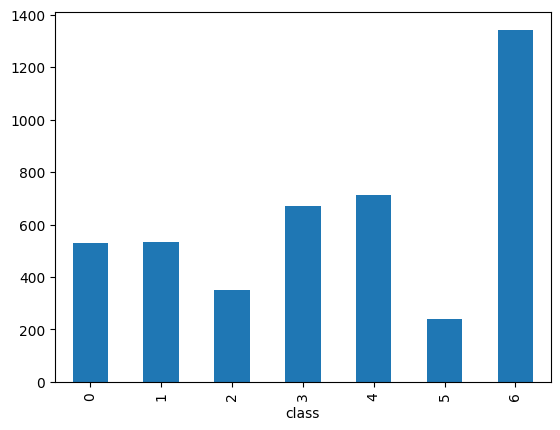

In [25]:
# Check if the dataset is balanced

human_data['class'].value_counts().sort_index().plot.bar()

I wanted to make the figures look more professional.

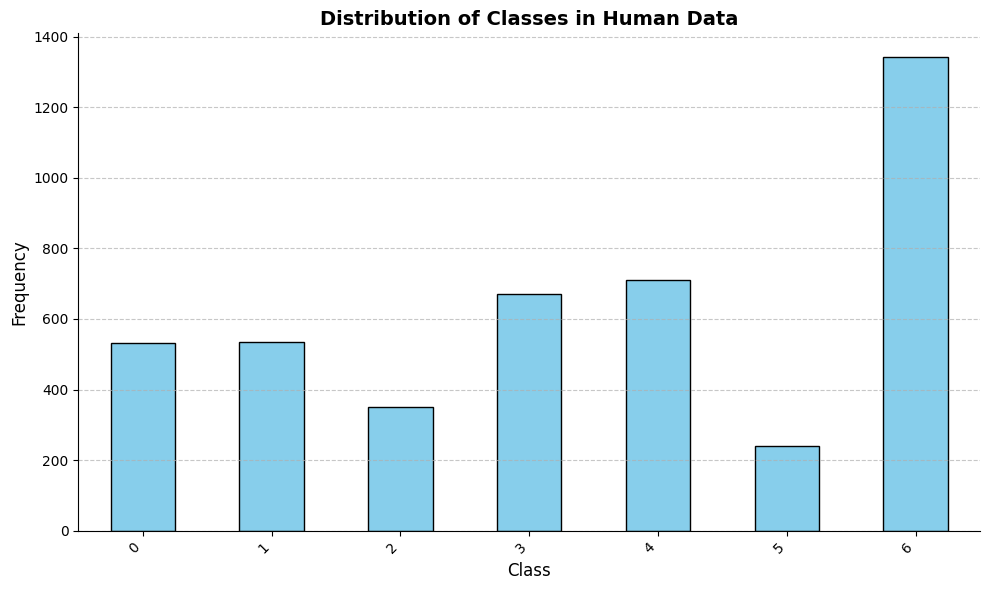

In [26]:
# Count the occurrences of each unique value in the 'class' column
class_counts = human_data['class'].value_counts()

# Sort the class counts by the index (class labels)
sorted_class_counts = class_counts.sort_index()

# Create a bar plot
ax = sorted_class_counts.plot.bar(
    color='skyblue',  # Set the color of the bars
    edgecolor='black',  # Add a border to the bars
    figsize=(10, 6)  # Set the size of the figure
)

# Add a title and labels
ax.set_title('Distribution of Classes in Human Data', fontsize=14, fontweight='bold')
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

By splitting our data into training and test sets, we can train our model on one portion of the data and then test its performance on unseen data, which helps in assessing how well the model generalizes to new data.



**Import Statement:** The `train_test_split` function is imported from `sklearn.model_selection`, which is a module in scikit-learn that provides tools for splitting datasets.

**Function Parameters:**

`X`: The feature matrix containing the transformed human sequences. This is the input data for our model.

`y_data`: The target variable array containing the class labels. This is what our model will learn to predict.

`test_size=0.20:` Specifies that 20% of the data should be allocated to the test set, leaving 80% for the training set. This is a common split ratio, but it can be adjusted based on the size of our dataset and the specific needs of your analysis.

`random_state=42`: Sets a seed for the random number generator, ensuring that the split is the same every time we run the code. This is important for reproducibility, especially when sharing results or comparing models.

**Output Variables:**

`X_train` and `y_train`: These are the training data and labels, which will be used to train our machine learning model.

`X_test` and `y_test`: These are the test data and labels, which will be used to evaluate the model's performance after training.

In [27]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y_data, test_size = 0.20 , random_state = 42)

In [28]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


**Importing the Multinomial Naive Bayes Classifier:**

The code imports the `MultinomialNB` class from the sklearn.naive_bayes module. This class is used to create a Multinomial Naive Bayes classifier, which is particularly suited for classification with discrete features, such as word counts in text classification.

**Creating the Classifier Instance:**

An instance of the `MultinomialNB` classifier is created with a specified `alpha` parameter. The alpha parameter is a smoothing parameter that helps to handle zero probabilities in the data. A value of `alpha=0.1` indicates that some smoothing is applied, which can improve the model's performance by preventing overfitting.

**Fitting the Classifier:**

The fit method is called on the classifier instance, passing in `X_train` and `y_train`. This method trains the classifier using the training data (X_train) and the corresponding labels (y_train). The model learns the relationship between the features and the target labels during this step.


In [29]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously

# Import the MultinomialNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier with alpha=0.1
classifier = MultinomialNB(alpha=0.1)

# Fit the classifier to the training data (X_train) and training labels (y_train)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

**Alpha Parameter:** The `alpha` parameter is crucial for handling cases where a feature does not appear in the training data for a particular class. By adding a small constant (smoothing), it ensures that the model can still make predictions even when encountering unseen data.

**Grid Search:** The comment mentions that the `alpha` parameter was determined by grid search. Grid search is a technique used to find the optimal hyperparameters for a model by evaluating a range of possible values and selecting the one that results in the best model performance.

**Predict Method:**

The predict method of the classifier object is called with X_test as the argument. This method uses the model that was trained earlier to predict the class labels for the samples in `X_test`.

**X_test:**

X_test is the test dataset containing the features for which you want to predict the class labels. It should have the same structure as `X_train`, which was used to train the model.

**y_pred:**

The result of the predict method is stored in `y_pred`. This variable contains the predicted class labels for each sample in `X_test`. These predictions can be compared to the true labels (y_test) to evaluate the performance of the classifier.

In [30]:
# Use the trained classifier to predict the class labels for the test data (X_test)
y_pred = classifier.predict(X_test)

The following code snippet is used to evaluate the performance of a classification model by calculating various performance metrics and displaying a confusion matrix.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Analysing the model performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the confusion matrix as a PNG image
plt.savefig('confusion_matrix.png')
plt.close()

# Print the confusion matrix
print("Confusion matrix \n")
print(pd.crosstab(pd.Series(y_test, name="Actual"), pd.Series(y_pred, name="Predicted")))

# Define a function to calculate performance metrics
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average="weighted")
    recall = recall_score(y_test, y_predicted, average="weighted")
    f1 = f1_score(y_test, y_predicted, average="weighted")
    return accuracy, precision, recall, f1

# Calculate and print the performance metrics
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix 

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


## Confusion Matrix
The confusion matrix is a table that summarizes the performance of a classification model by showing the number of correct and incorrect predictions for each class. 


**Rows:** Represent the actual class labels.
Columns: Represent the predicted class labels.

**Diagonal Elements:** These are the counts of correct predictions for each class. For example, the model correctly predicted 99 instances of class 0, 104 instances of class 1, and so on.

**Off-Diagonal Elements:** These are the counts of incorrect predictions. For example, there is 1 instance of class 0 that was incorrectly predicted as class 4, and 2 instances of class 0 that were incorrectly predicted as class 6.

## Performance Metrics
**Accuracy:**

Value: 0.984
Interpretation: The model correctly predicted 98.4% of the instances. This is a high accuracy, indicating that the model performs well overall.

**Precision:**

Value: 0.984
Interpretation: On average, 98.4% of the instances predicted as positive (for any class) were actually positive. This high precision suggests that the model makes few false positive errors.

**Recall:**

Value: 0.984
Interpretation: On average, the model correctly identified 98.4% of the actual positive instances. This high recall indicates that the model is effective at capturing the true positive instances.

**F1-Score:**

Value: 0.984
Interpretation: The F1-score is the harmonic mean of precision and recall, and a value of 0.984 indicates a good balance between precision and recall. This suggests that the model is both precise and comprehensive in its predictions.

## Overall Interpretation:

The confusion matrix and performance metrics together suggest that the model is performing exceptionally well. The high values for accuracy, precision, recall, and F1-score indicate that the model is making very few errors, both in terms of false positives and false negatives. The confusion matrix shows that most predictions are on the diagonal, meaning they are correct, with very few off-diagonal errors.

This level of performance is typically desirable in classification tasks, as it suggests that the model is reliable and effective at distinguishing between the different classes. However, it's always important to consider the context of the problem and the potential impact of any misclassifications, even if they are rare.